_____________________________________________________________________________________________________________________________________________________________________________________________

Анализ данных

<Axes: >

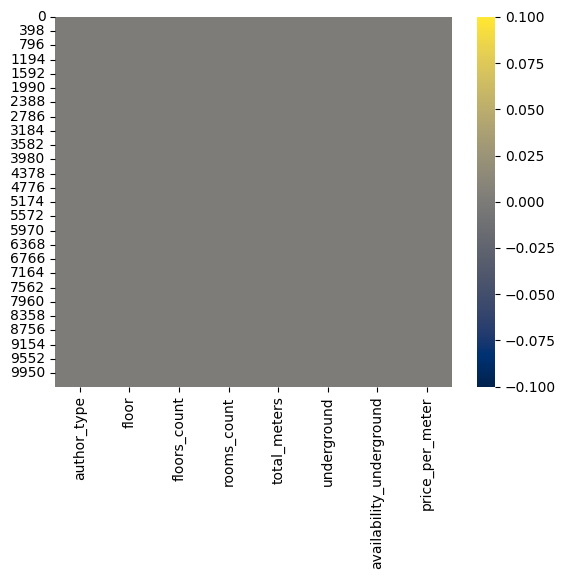

In [59]:
import pandas as pd
import seaborn as sns

path_base = "base.csv"
# path_base = 'result.csv'

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

In [ ]:
import pandas as pd

path_base = "base.csv"

df = pd.read_csv(path_base)

# Вычисление границ IQR
Q1, Q3 = df['price_per_meter'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  

# Отсеивание выбросов
df_cleaned = df[(df['price_per_meter'] >= lower_bound) & (df['price_per_meter'] <= upper_bound)]

df_cleaned.to_csv( path_base, index=False, encoding='utf-8-sig')


__________________________________________________________________________________________________________________________________________________________________________________________________



In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()

,floor,floors_count,rooms_count,total_meters,price_per_meter
count,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000
mean,8.297753,16.754359,2.214645,65.034401,305777.449244
std,8.004810,11.440961,1.068892,34.623901,188946.878946
min,1.000000,1.000000,1.000000,9.000000,7812.000000
25%,3.000000,9.000000,1.000000,40.000000,164784.000000
50%,6.000000,15.000000,2.000000,55.900000,252329.000000
75%,11.000000,22.000000,3.000000,79.000000,412187.000000
max,82.000000,95.000000,4.000000,342.800000,930000.000000


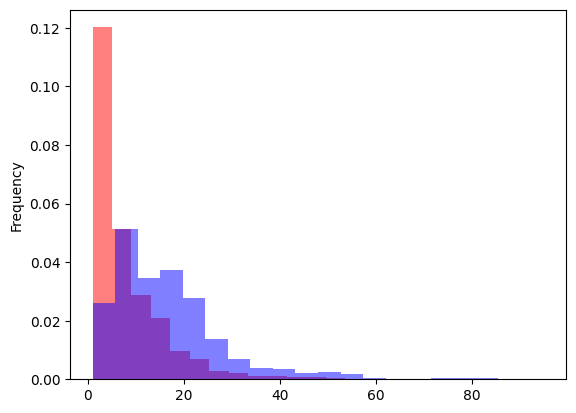

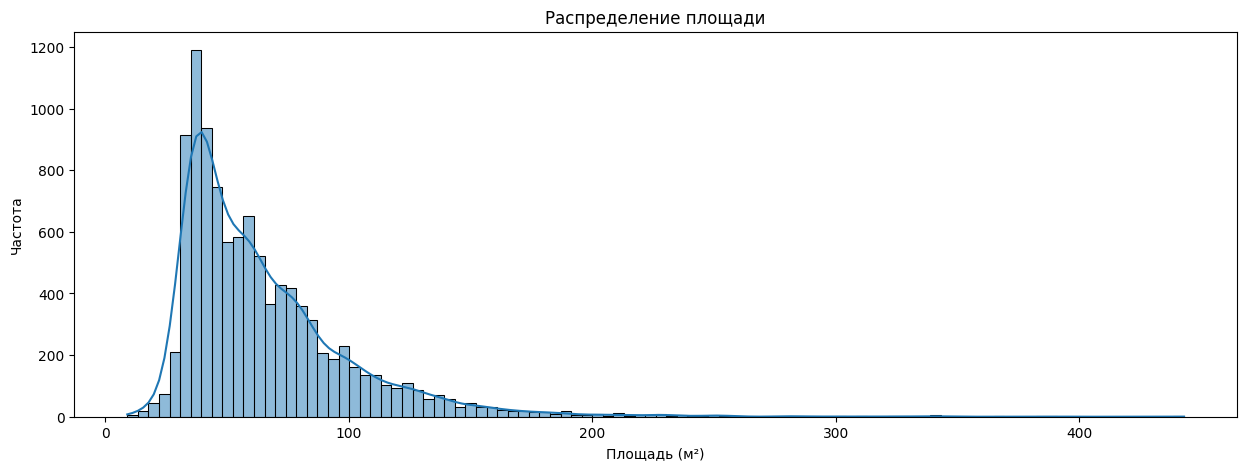

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()

#############################################################################################################################################

df.floor.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='r')
df.floors_count.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='b')

#############################################################################################################################################

plt.figure(figsize=(15, 5))
sns.histplot(df['total_meters'], bins=100, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
plt.show()


In [48]:
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

print(df['author_type'].value_counts())
print('-------------------------------------------------')
print(df['rooms_count'].value_counts())

author_type
real_estate_agent           4798
developer                   4342
realtor                      497
representative_developer     361
homeowner                    281
official_representative       50
Name: count, dtype: int64
-------------------------------------------------
rooms_count
1    3354
2    3074
3    2224
4    1677
Name: count, dtype: int64


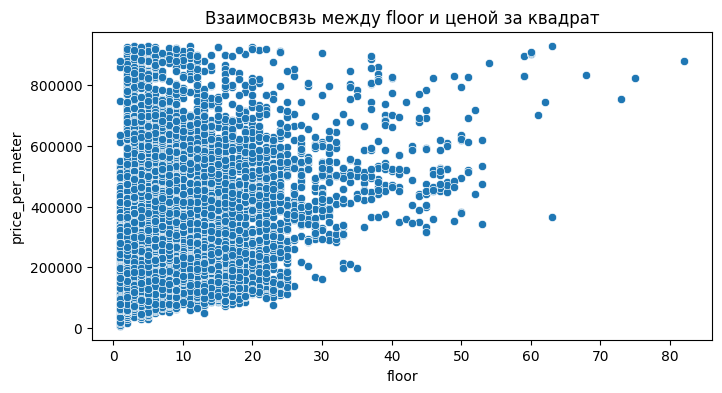

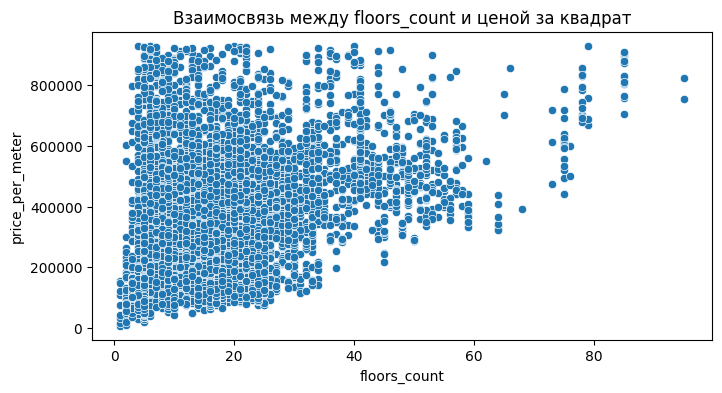

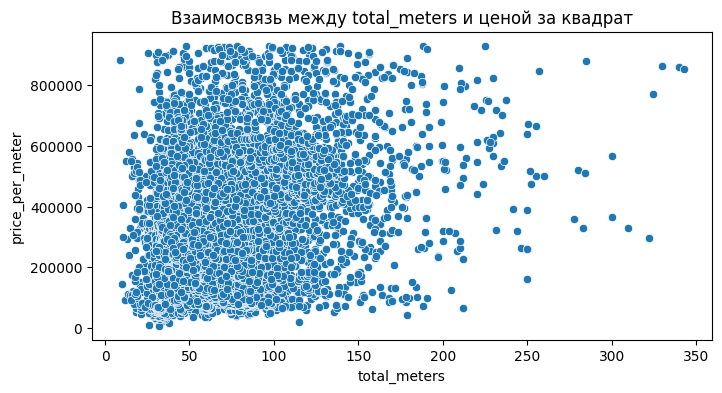

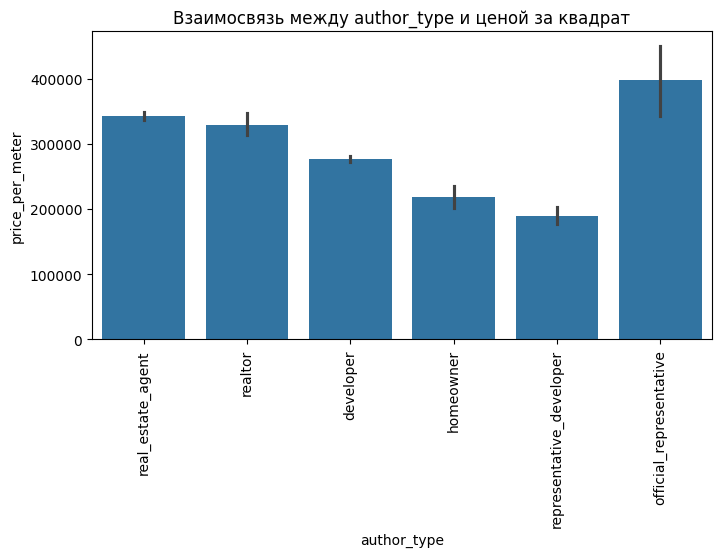

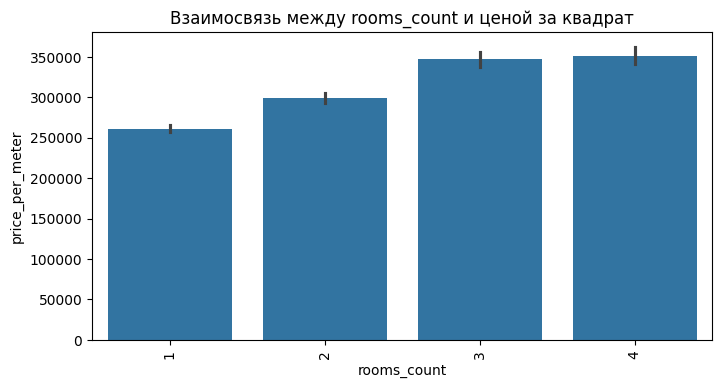

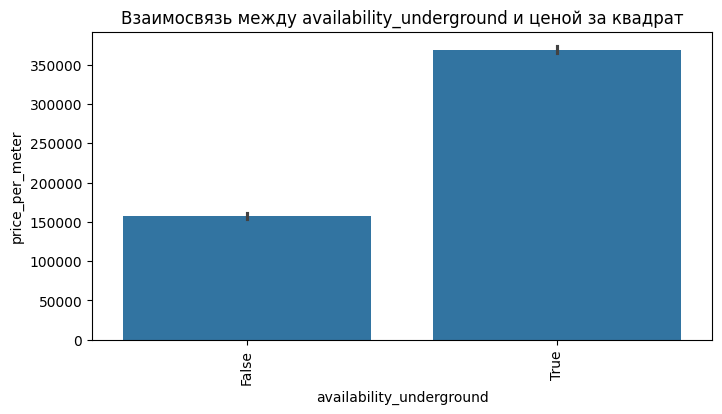

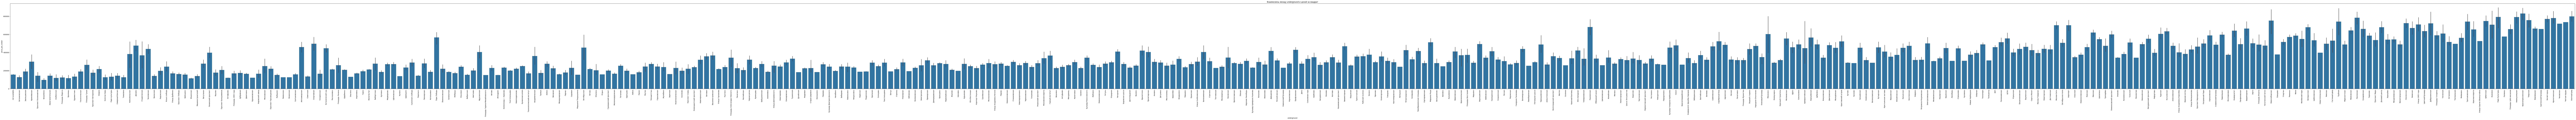

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#############################################################################################################################################

columns_to_plot = ['floor','floors_count','total_meters']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column, y='price_per_meter')
    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.ylabel('price_per_meter')
    plt.show()

#############################################################################################################################################

columns_to_plot = ['author_type','rooms_count','availability_underground']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    sns.barplot(data=df, x=column, y='price_per_meter')

    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('price_per_meter')

    plt.show()

#############################################################################################################################################

plt.figure(figsize=(300, 10))

sns.barplot(data=df, x='underground', y='price_per_meter', order=df.sort_values('price_per_meter').underground)

plt.title('Взаимосвязь между underground и ценой за квадрат')
plt.xlabel('underground')
plt.xticks(rotation=90)
plt.ylabel('price_per_meter')

plt.show()




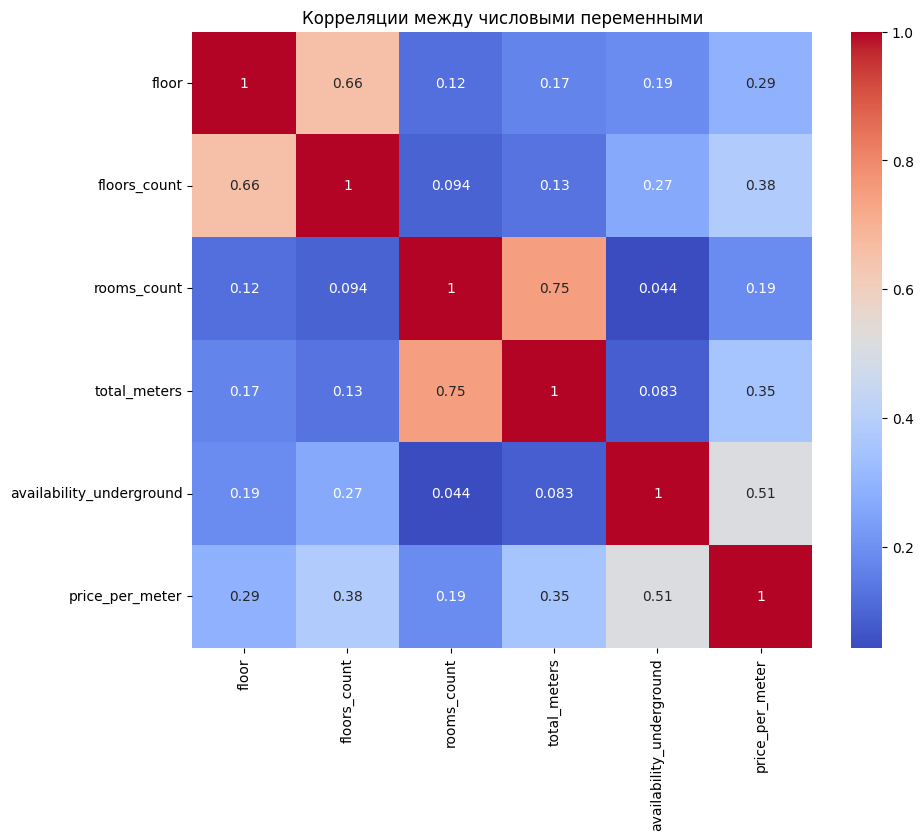

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#############################################################################################################################################

numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()